In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('82.csv')

In [11]:
wcss = []
for i in range(1, 11):  # Mencoba jumlah cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Raport']])
    wcss.append(kmeans.inertia_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

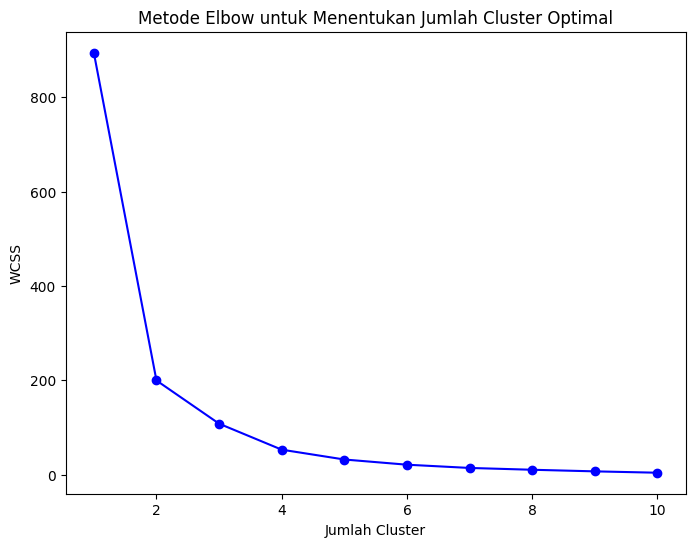

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
optimal_clusters = 4

In [15]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Raport']])

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
def kategori_pemahaman(cluster):
    if cluster == 0:
        return 'Kurang Memahami'  # Cluster 1: Rentang Nilai = 64 - 66
    elif cluster == 1:
        return 'Baik'  # Cluster 3: Rentang Nilai = 67 - 70
    elif cluster == 2:
        return 'Cukup Faham'  # Cluster 4: Rentang Nilai = 71 - 76
    elif cluster == 3:
        return 'Sangat Faham'

In [17]:
df['Kategori Pemahaman'] = df['Cluster'].apply(kategori_pemahaman)

In [18]:
kategori_counts = df['Kategori Pemahaman'].value_counts()

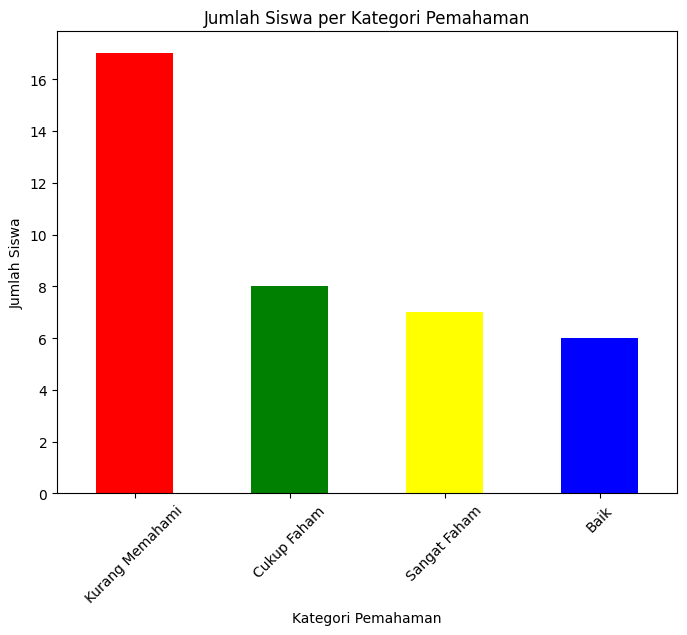

In [19]:
plt.figure(figsize=(8,6))
kategori_counts.plot(kind='bar', color=['red', 'green', 'yellow', 'blue'])
plt.title('Jumlah Siswa per Kategori Pemahaman')
plt.xlabel('Kategori Pemahaman')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=45)
plt.show()